In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from numba import njit
from fits_library import *

In [3]:
@njit
def walk_1D(n_steps, p):
    """
    Random walk in 1 dimension. 
    n_steps is the number of steps in the random walk. p is the probability of moving one step to the right. 
    """
    pos = 0; toss = 0;
    trajectory = np.zeros(n_steps)
    for i in range(n_steps):
        toss = np.random.randint(0, 2) #0 -> right and 1 -> left
        if toss == 0:
            pos += 1
        elif toss == 1:
            pos -= 1 
        trajectory[i] = pos
    final_pos = trajectory[-1]
    return final_pos, trajectory

In [4]:
"""
Perform N random walks with n steps
"""
n_steps = 2**13; N = 2**15; #n_steps is no of steps in each walk and N is the number of walks to be simulated
p = 0.5 #probability of moving to the right at each step
walks = np.zeros((N, n_steps)) #list to store the trajectory of each walk, shape = N * n_steps
last_step = np.zeros(N)
for i in range(N):
    last_step[i], walks[i] = walk_1D(n_steps, p)

In [5]:
"""
Do a Gaussian fit to data
"""
mu, sigma = norm.fit(last_step)
x = np.linspace(-350, 350, 10000)
pdf = norm.pdf(x, mu, sigma)
print(mu, sigma)

-0.59954833984375 90.36865301121638


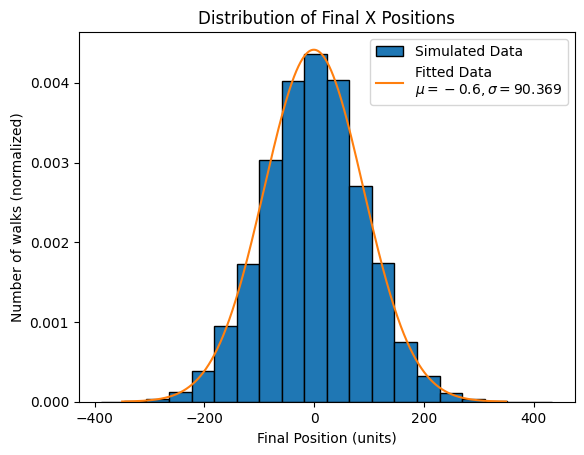

In [6]:
"""
Plot histogram with Gaussian over it
"""
plt.hist(last_step, bins = 20, density = True, edgecolor = 'black', label = 'Simulated Data')
plt.plot(x, pdf, label="Fitted Data\n"r"$\mu"f" = {round(mu, 3)}," r" \sigma"f" = {round(sigma, 3)}$")
plt.xlabel("Final Position (units)")
plt.ylabel("Number of walks (normalized)")
#plt.title(f"{N} walks of {n_steps} steps each")
plt.title("Distribution of Final X Positions")
plt.legend()
plt.show()

In [7]:
"""
See what the mean is and the standard deviation and check is sigma = sqrt(n_steps)
"""
print(f"The mean distance covered is {mu}")
print(f"The standard deivation is {sigma}")
print(f"The square of the standard deviation is {sigma ** 2} and the number of steps is {n_steps}")

The mean distance covered is -0.59954833984375
The standard deivation is 90.36865301121638
The square of the standard deviation is 8166.493447061627 and the number of steps is 8192


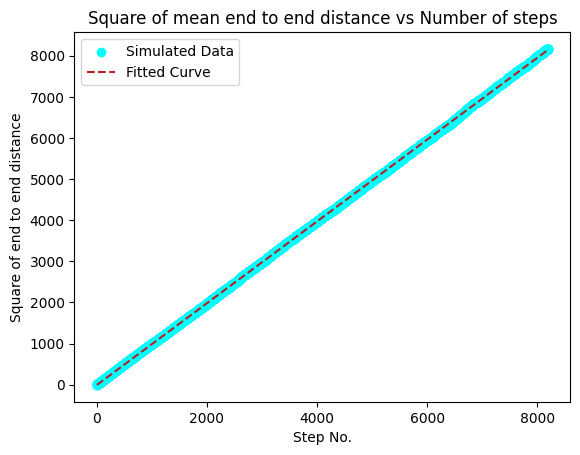

In [17]:
walks_sq = np.abs(walks) ** 2
Rd = np.mean(np.abs(walks_sq), axis = 0)
steps_arr = np.arange(1, n_steps+1, 1)
plt.scatter(steps_arr, Rd, label = 'Simulated Data', color = 'aqua')
plt.xlabel("Step No.")
plt.ylabel("Square of end to end distance")
plt.title("Square of mean end to end distance vs Number of steps")
slope, intercept, slope_err, intercept_err = linear_fit(steps_arr, Rd)
plt.plot(steps_arr, slope * steps_arr + intercept, '--', color = 'firebrick', label = 'Fitted Curve')
plt.legend()
plt.show()

In [16]:
slope, intercept

(0.6323141630154647, 0.7254618818136856)